In [1]:
import pandas as pd

import seaborn as sns

print("Hello")

print(type(sns))



df = pd.read_csv("data/gps_coords/2023_03_09_23_01_05_triton_c_gps_coords_Now-1Hour.csv")
df.info()

Hello
<class 'module'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  429 non-null    int64  
 1   Timestamp   429 non-null    object 
 2   GPS_Lat     429 non-null    float64
 3   GPS_Lng     429 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.5+ KB


In [2]:
df["Timestamp"]

0      2023-03-09 23:00:58
1      2023-03-09 23:00:52
2      2023-03-09 23:00:42
3      2023-03-09 23:00:41
4      2023-03-09 23:00:40
              ...         
424    2023-03-09 22:02:10
425    2023-03-09 22:02:09
426    2023-03-09 22:01:52
427    2023-03-09 22:01:35
428    2023-03-09 22:01:10
Name: Timestamp, Length: 429, dtype: object

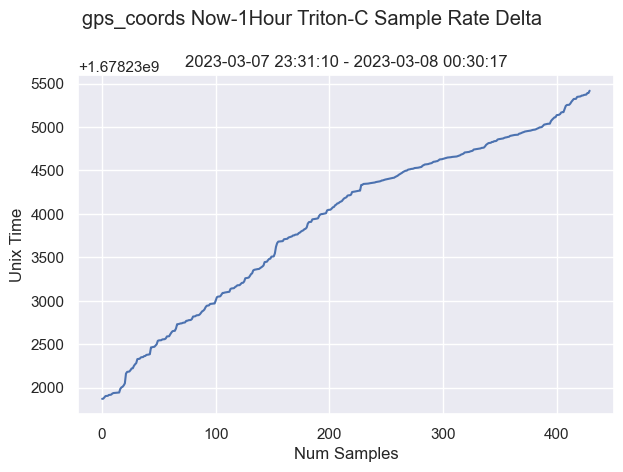

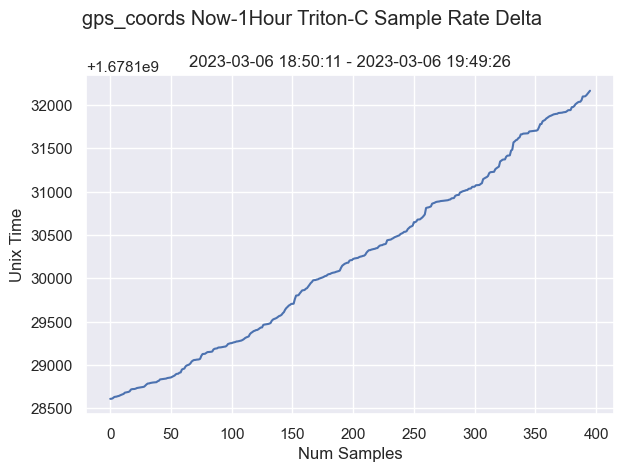

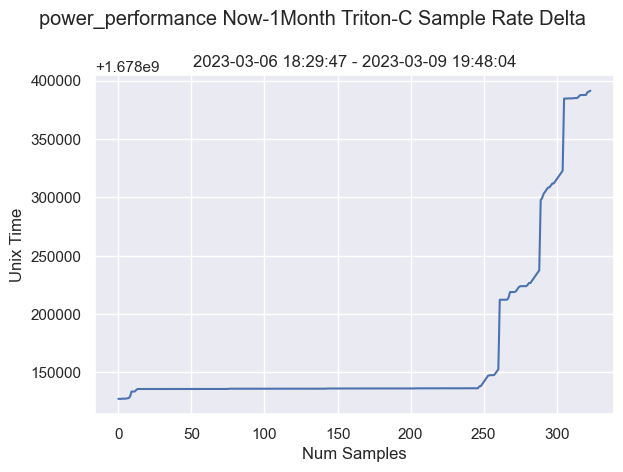

In [3]:
from datetime import datetime
import json
import matplotlib.pyplot as plt

sns.set_theme()

def unix_ts_to_str(ts):
    ts = int(ts)
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

def plot_timestamp(json_fname, data_set, duration_string):
    f = open(json_fname)
    data = json.load(f)
    timestamps = [x[0] / 1000 for x in data["data"]]
    timestamps.reverse()
    sns.lineplot(timestamps)
    plt.xlabel("Num Samples")
    plt.ylabel("Unix Time")
    first_timestamp = timestamps[0]
    last_timestamp = timestamps[-1]
    # print(unix_ts_to_str(first_timestamp))
    plt.suptitle(f"{data_set} {duration_string} Triton-C Sample Rate Delta")
    plt.title(f"{unix_ts_to_str(first_timestamp)} - {unix_ts_to_str(last_timestamp)}")
    plt.tight_layout()
    plt.show()

plot_timestamp("data/gps_coords/2023_03_08_00_31_04_triton_c_gps_coords_Now-1Hour.json", "gps_coords", "Now-1Hour")

plot_timestamp("data/gps_coords/2023_03_06_19_50_04_triton_c_gps_coords_Now-1Hour.json", "gps_coords", "Now-1Hour")

plot_timestamp("data/power_performance/2023_03_09_19_49_04_triton_c_power_performance_Now-1Month.json", "power_performance", "Now-1Month")


In [4]:
from nptdms import TdmsFile
import numpy as np

59999
59999


Text(0.5, 1.0, 'Sample Rate Analysis')

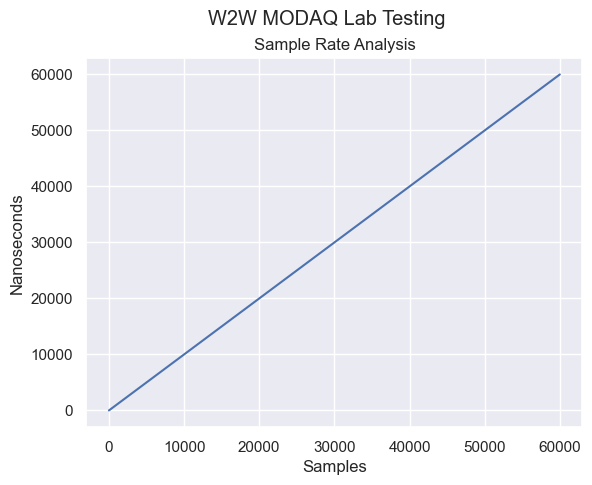

In [11]:
tdms_fname = "data/tdms_compare/2022_1_14_17_0_AI Data.tdms"
tdms_file = TdmsFile(tdms_fname)

data = []

for group in tdms_file.groups():
    this_df = group.as_dataframe()
    data.append(this_df)

df = data[0]
df.columns

# df["GPS Time"].plot()

# plt.show()

deltas = []

for i in range(1, len(df["GPS Time"])):
    last_timestamp = df["GPS Time"][i - 1]
    this_timestamp = df["GPS Time"][i]
    deltas.append(this_timestamp - last_timestamp)

    
x = list(range(len(df["GPS Time"]) - 1))
y = deltas

print(len(x))
print(len(y))

# print(deltas)
    
    
plt.plot(x)
plt.ylabel("Nanoseconds")
plt.xlabel("Samples")
plt.suptitle("W2W MODAQ Lab Testing")
plt.title("Sample Rate Analysis")


In [ ]:
plt.scatter(x, y, marker=",", s=0.6)

In [6]:
triton_csv = pd.read_csv("data/gps_coords/2023_03_06_19_06_04_triton_c_gps_coords_Now-1Hour.csv")
triton_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  242 non-null    int64  
 1   Timestamp   242 non-null    object 
 2   GPS_Lat     242 non-null    float64
 3   GPS_Lng     242 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.7+ KB


In [7]:
time_delta = []
triton_csv["Timestamp"] = pd.to_datetime(triton_csv["Timestamp"])

for i in range(1, len(triton_csv)):
    ts_key = "Timestamp"
    prev_timestamp = triton_csv[ts_key][i - 1].to_datetime64()
    this_timestamp = triton_csv[ts_key][i].to_datetime64()
    delta = prev_timestamp - this_timestamp
    # print(type(delta))
    # delta
    time_delta.append(delta)
    # print(delta.total_seconds())
    # print(delta.components)
    this_time_delta = False 

Text(0.5, 1.0, 'Triton-C Sample Rate Analysis')

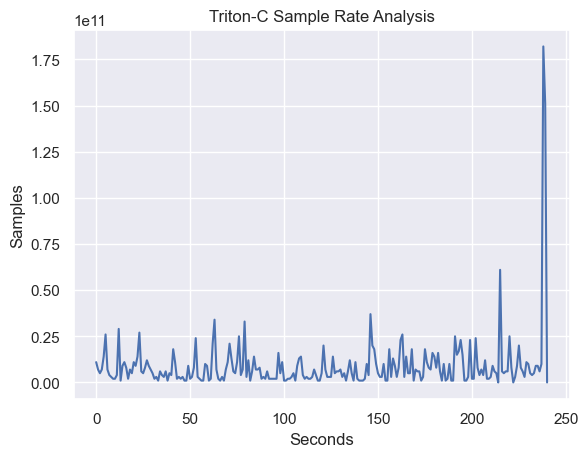

In [12]:
plt.plot(time_delta)
plt.xlabel("Seconds")
plt.ylabel("Samples")
plt.title("Triton-C Sample Rate Analysis")